In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
img = cv2.imread('media/araba.jpg')

In [4]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

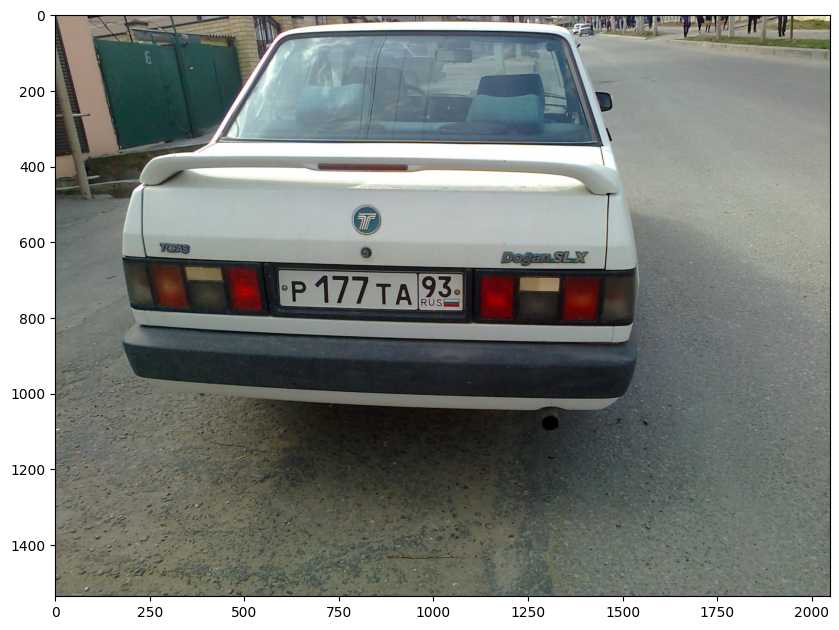

In [5]:
display(img)

In [10]:
plate_cascade=cv2.CascadeClassifier("media/haarcascade_russian_plate_number.xml")

In [17]:
def detect_plate(img):
    araba=img.copy()

    plate_rects=plate_cascade.detectMultiScale(araba,scaleFactor=1.3,minNeighbors=3)

    for (x,y,w,h) in plate_rects:
        cv2.rectangle(araba,(x,y),(x+w,y+h),(255,0,0),10)
    
    return araba

In [18]:
result=detect_plate(img)

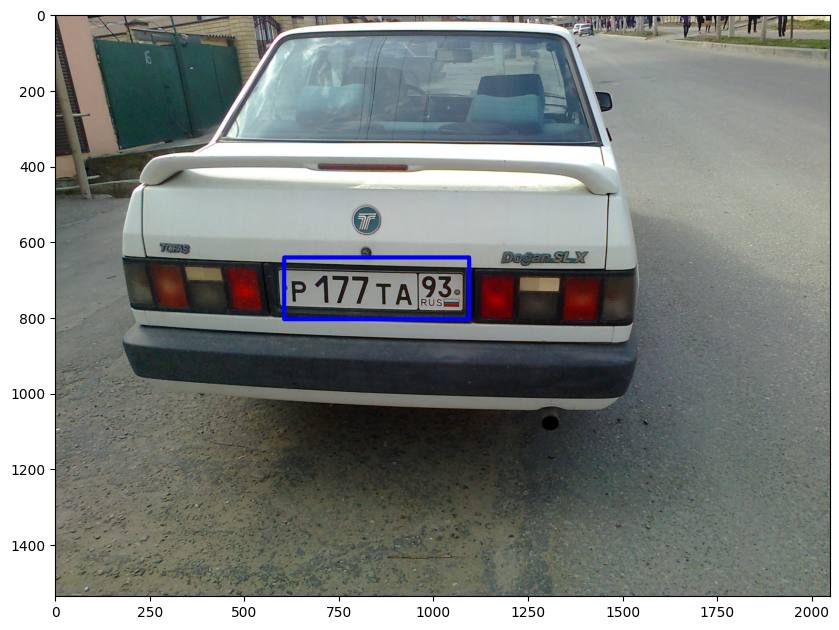

In [19]:
display(result)

In [36]:
def detect_and_blur_plate(img):
    plate_img=img.copy()
    roi=img.copy()
    plate_rects=plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3) 

    for (x,y,w,h) in plate_rects: #konumlari buluyourz
        
        roi=roi[y:y+h,x:x+w] #blurlannacak kisim(plaka kismi)
        
        blurred_roi=cv2.medianBlur(roi,45) #blurlama islemi
        
        plate_img[y:y+h,x:x+w]=blurred_roi #blurlanmis plaka kismi orjinal resme yerlestiriliyor
    

    return plate_img



In [37]:
result = detect_and_blur_plate(img)

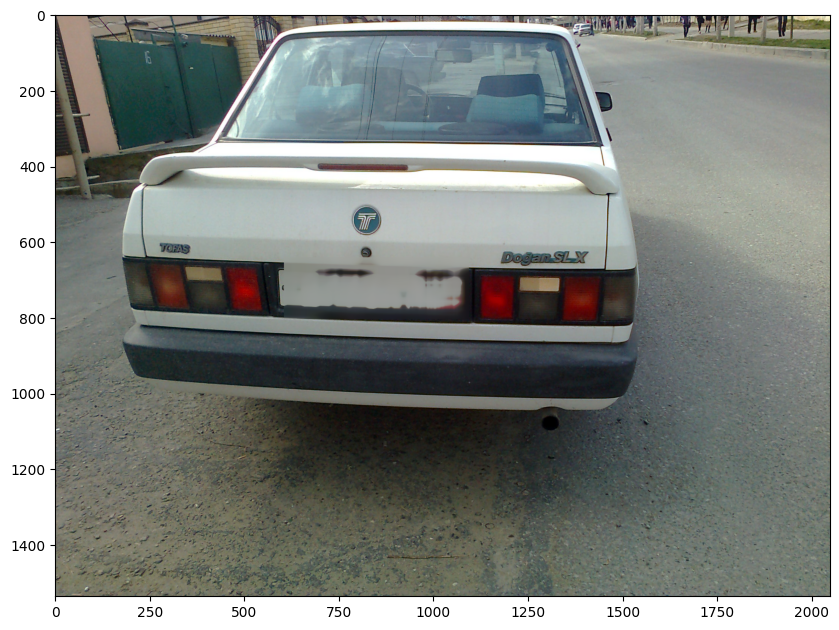

In [38]:
display(result)